In [1]:
%pip install mlflow

  Using cached docker-7.1.0-py3-none-any.whl.metadata (3.8 kB)
   ---------------------------------------- 0.0/28.2 MB ? eta -:--:--
   -- ------------------------------------- 1.8/28.2 MB 10.1 MB/s eta 0:00:03
   ---- ----------------------------------- 3.4/28.2 MB 8.4 MB/s eta 0:00:03
   ------- -------------------------------- 5.2/28.2 MB 8.2 MB/s eta 0:00:03
   --------- ------------------------------ 6.8/28.2 MB 8.2 MB/s eta 0:00:03
   ----------- ---------------------------- 8.4/28.2 MB 8.1 MB/s eta 0:00:03
   -------------- ------------------------- 10.0/28.2 MB 8.0 MB/s eta 0:00:03
   ---------------- ----------------------- 11.8/28.2 MB 8.0 MB/s eta 0:00:03
   ------------------- -------------------- 13.9/28.2 MB 8.2 MB/s eta 0:00:02
   --------------------- ------------------ 15.2/28.2 MB 8.0 MB/s eta 0:00:02
   ----------------------- ---------------- 16.5/28.2 MB 7.9 MB/s eta 0:00:02
   ------------------------- -------------- 18.4/28.2 MB 7.9 MB/s eta 0:00:02
   ----------

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

### Data Reading

In [3]:
df = pd.read_csv('dataset/processed.cleveland.data', header=None)

In [4]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


No labels for the columns, so we name them. Refer: https://archive.ics.uci.edu/dataset/45/heart+disease

In [5]:
df.columns = [
    'age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'hd'	
]
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,hd
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


### Dealing with Missing Data

In [6]:
df.dtypes

age         float64
sex         float64
cp          float64
trestbps    float64
chol        float64
fbs         float64
restecg     float64
thalach     float64
exang       float64
oldpeak     float64
slope       float64
ca           object
thal         object
hd            int64
dtype: object

`ca` and `thal` have type object, it means that they have mixed types of values

In [7]:
df['ca'].unique()

array(['0.0', '3.0', '2.0', '1.0', '?'], dtype=object)

In [8]:
df['thal'].unique()

array(['6.0', '3.0', '7.0', '?'], dtype=object)

As we can see above, in the last place there is a '?' symbol, which indicates missing value and is responsible for converting it to type *object*

In [9]:
# Number of rows that have missing values in the column of 'ca' and 'thal' 
len(df.loc[(df['ca'] == '?')
           |
           (df['thal'] == '?')])

6

In [10]:
df.loc[(df['ca'] == '?')
           |
           (df['thal'] == '?')]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,hd
87,53.0,0.0,3.0,128.0,216.0,0.0,2.0,115.0,0.0,0.0,1.0,0.0,?,0
166,52.0,1.0,3.0,138.0,223.0,0.0,0.0,169.0,0.0,0.0,1.0,?,3.0,0
192,43.0,1.0,4.0,132.0,247.0,1.0,2.0,143.0,1.0,0.1,2.0,?,7.0,1
266,52.0,1.0,4.0,128.0,204.0,1.0,0.0,156.0,1.0,1.0,2.0,0.0,?,2
287,58.0,1.0,2.0,125.0,220.0,0.0,0.0,144.0,0.0,0.4,2.0,?,7.0,0
302,38.0,1.0,3.0,138.0,175.0,0.0,0.0,173.0,0.0,0.0,1.0,?,3.0,0


There are 6 rows that have one missing value, since they are so less (as compared to 302) from the whole dataset, we can simply remove them without affecting much of the actual output

In [11]:
df_with_no_missing = df.loc[(df['ca'] != '?')
                        &
                        (df['thal'] != '?')]

In [12]:
df_with_no_missing.info()

<class 'pandas.core.frame.DataFrame'>
Index: 297 entries, 0 to 301
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       297 non-null    float64
 1   sex       297 non-null    float64
 2   cp        297 non-null    float64
 3   trestbps  297 non-null    float64
 4   chol      297 non-null    float64
 5   fbs       297 non-null    float64
 6   restecg   297 non-null    float64
 7   thalach   297 non-null    float64
 8   exang     297 non-null    float64
 9   oldpeak   297 non-null    float64
 10  slope     297 non-null    float64
 11  ca        297 non-null    object 
 12  thal      297 non-null    object 
 13  hd        297 non-null    int64  
dtypes: float64(11), int64(1), object(2)
memory usage: 34.8+ KB


As we can see, the rows with missing values are removed (total rows are 297 now), however the columns 'ca' and 'thal' still have dtypes as *objects*

### Splitting the Data

In [13]:
# Independent Variables
X = df_with_no_missing.drop('hd', axis=1).copy()
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0


In [14]:
y = df_with_no_missing['hd'].copy()
y.head()

0    0
1    2
2    1
3    0
4    0
Name: hd, dtype: int64

In [15]:
numerical_cols = ['age', 'sex', 'trestbps', 'chol', 'fbs', 'thalach', 'exang', 'oldpeak']
categorical_cols = ['restecg', 'slope', 'thal', 'ca', 'cp'] # We will pass this through OneHotEncoder

**One Hot Encoding** the categorical variables

In [16]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [17]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numerical_cols),                  # Keep numerical columns as is
        ('cat', OneHotEncoder(drop='first'), categorical_cols)   # One-hot encode categorical columns
    ]
)

**Changing the values of 'y'**

In [18]:
y.unique()

array([0, 2, 1, 3, 4], dtype=int64)

Since we only want to classify, whether the person has heart disease or not, we need 2 classifications only i.e. `1 or 0`. So we will convert all the non-zero values as one, as we do need to calculate the intensity

In [19]:
y_not_zero = y > 0
y[y_not_zero] = 1
y.unique()

array([0, 1], dtype=int64)

_Split into train and test_

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Build a Preliminary Classification Tree

In [21]:
# Fit and transform the data using the preprocessor
X_train_transformed = preprocessor.fit_transform(X_train)
X_test_transformed = preprocessor.transform(X_test)

In [22]:
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train_transformed, y_train)

DecisionTreeClassifier(random_state=42)

**Evaluate the model**

In [23]:
train_score = dt_model.score(X_train_transformed, y_train)
test_score = dt_model.score(X_test_transformed, y_test)

print(f"Training Accuracy: {train_score:.2f}")
print(f"Testing Accuracy: {test_score:.2f}")

Training Accuracy: 1.00
Testing Accuracy: 0.72


**Plot it**

In [27]:
from sklearn.tree import plot_tree
from sklearn.model_selection import cross_val_score
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

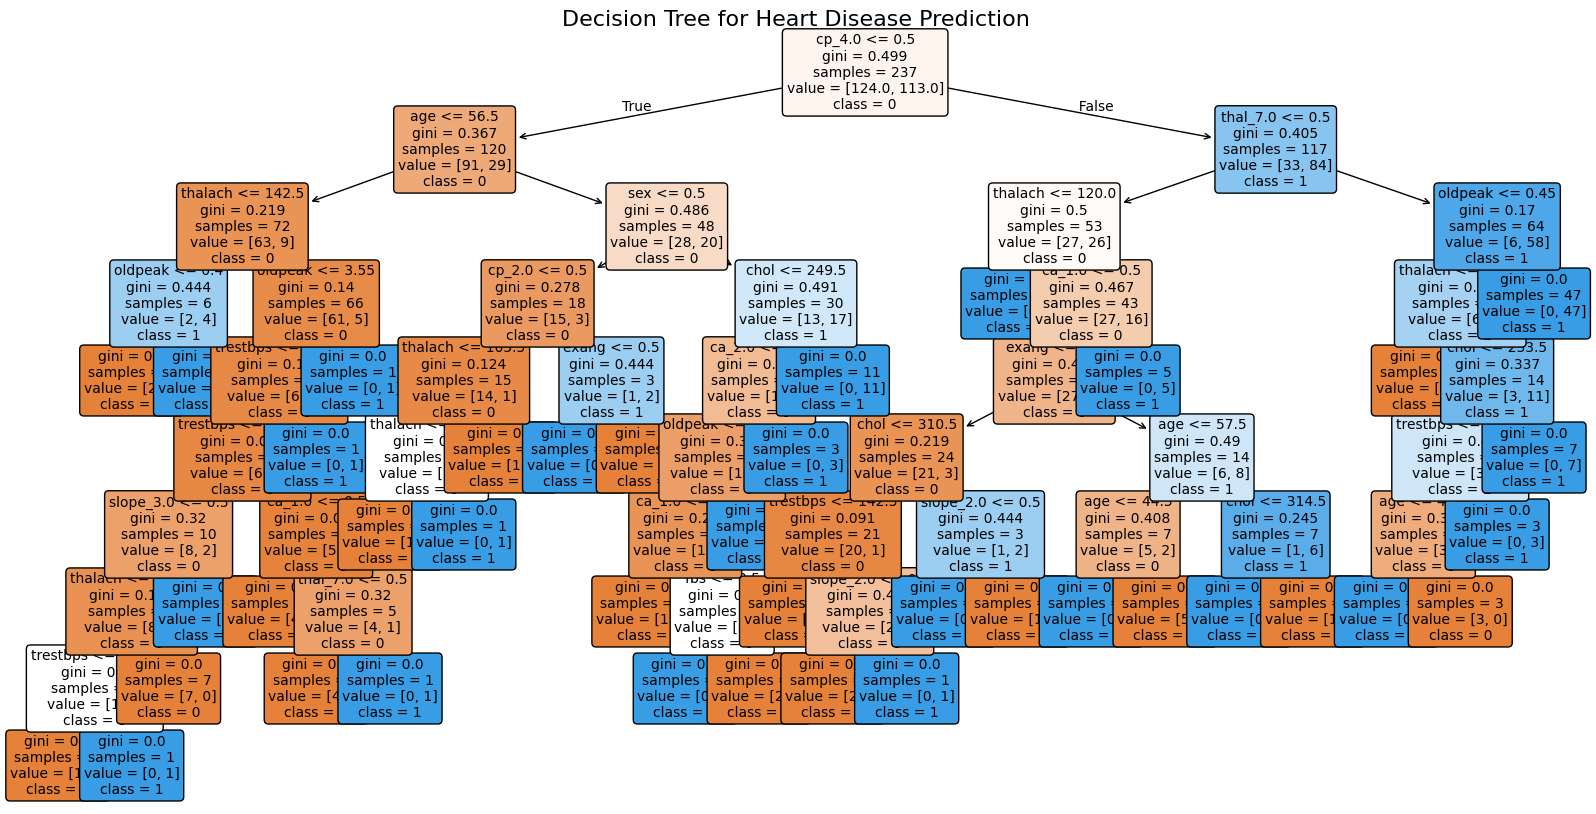

In [25]:
#  Get feature names after transformation
feature_names = numerical_cols + list(preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_cols))

# Plot the Decision Tree
plt.figure(figsize=(20, 10))  # Set figure size for better readability
plot_tree(
    dt_model,
    feature_names=feature_names,
    class_names=[str(i) for i in sorted(y.unique())],  # Convert class labels to strings
    filled=True,  # Color nodes by class
    rounded=True,  # Rounded boxes for nodes
    fontsize=10   # Font size for readability
)
plt.title("Decision Tree for Heart Disease Prediction", fontsize=16)
plt.show()

Seeing how it actually performs on the Testing Dataset by using a **Confusion Matrix**

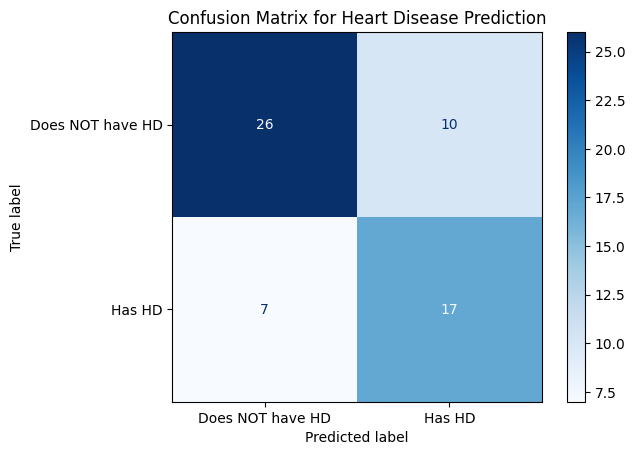

In [29]:
# ConfusionMatrixDisplay.from_estimator(
#     dt_model,
#     X_test,
#     y_test,
#     display_labels=["Does NOT have HD", "Has HD"]
# )
# Generate predictions
y_pred = dt_model.predict(X_test_transformed)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Does NOT have HD", "Has HD"])
disp.plot(cmap='Blues', values_format='d')
plt.title("Confusion Matrix for Heart Disease Prediction")
plt.show()

We see that a `26 + 10 = 36` did NOT have a **heart disease**, **26 (72.2%)** were correctly classified. \
Of the `7 + 17 = 24` that did have a **heart disease**, **17 (70.8)** were correctly classified